In [ ]:
import tensorflow as tf
import numpy as np
import seaborn as sns
import os
import random
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Flatten
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import roc_curve, auc
import cv2
from sklearn.metrics import confusion_matrix

In [ ]:
# train_dataset_path = '/content/drive/MyDrive/DATASET A/Train'
# test_dataset_path = '/content/drive/MyDrive/DATASET A/Test'
train_dataset_path = '/content/drive/MyDrive/Dataset A2/Train'
test_dataset_path = '/content/drive/MyDrive/Dataset A2/Test'

In [ ]:
input_shape = (150, 120, 3)
batch_size = 32
epochs =100
num_folds = 5

In [ ]:
def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = load_img(img_path, target_size=(150, 120))
        img = img_to_array(img) / 255.0  # Normalize the image
        images.append(img)
        labels.append(label)
    return images, labels

In [ ]:
healthy_images, healthy_labels = load_images_from_folder(os.path.join(train_dataset_path, 'Healthy MT'), label=0)
lesion_images, lesion_labels = load_images_from_folder(os.path.join(train_dataset_path, 'Lesion MT'), label=1)

images = healthy_images + lesion_images
labels = healthy_labels + lesion_labels

images = np.array(images)
labels = np.array(labels)

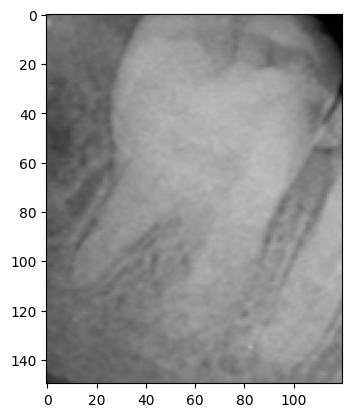

In [ ]:
plt.imshow(images[0])
plt.show()

In [ ]:
from sklearn.model_selection import KFold

# Initialize KFold
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
# To store accuracy of each fold
fold_accuracies1 = []

In [ ]:
from tensorflow.keras.applications import DenseNet121


def create_model():
    base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=input_shape)
    for layer in base_model.layers:
        layer.trainable = False

    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dropout(0.4),
        Dense(256, activation='relu'),
        Dropout(0.35),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model




def augment_data(image):
    # if random.random() > 0.5:
    image = np.fliplr(image)
    return image

In [ ]:
model=create_model()
model.summary()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 4, 3, 1024)        7037504   
                                                                 
 global_average_pooling2d_3  (None, 1024)              0         
 6 (GlobalAveragePooling2D)                                      
                                                                 
 dropout_72 (Dropout)        (None, 1024)              0         
                                                                 
 dense_72 (Dense)            (None, 256)               262400    
                                                                 
 dropout_73 (Dropout)        (None, 256)               0         
                                                                 
 dense_73 (Dense)            (None, 1)                 257       
                                                     

In [ ]:
# Iterate over each fold
splits = kf.split(images)

Training on Fold 1/5
Epoch 1/100
6/6 [==============================] - 9s 659ms/step - loss: 0.6048 - accuracy: 0.6839 - val_loss: 0.4084 - val_accuracy: 0.8636
Epoch 2/100
6/6 [==============================] - 2s 307ms/step - loss: 0.2482 - accuracy: 0.9080 - val_loss: 0.3320 - val_accuracy: 0.8409
Epoch 3/100
6/6 [==============================] - 2s 311ms/step - loss: 0.2778 - accuracy: 0.9023 - val_loss: 0.3281 - val_accuracy: 0.8864
Epoch 4/100
6/6 [==============================] - 2s 298ms/step - loss: 0.2279 - accuracy: 0.9310 - val_loss: 0.3854 - val_accuracy: 0.8864
Epoch 5/100
6/6 [==============================] - 2s 296ms/step - loss: 0.1979 - accuracy: 0.9253 - val_loss: 0.2929 - val_accuracy: 0.8864
Epoch 6/100
6/6 [==============================] - 2s 294ms/step - loss: 0.1794 - accuracy: 0.9368 - val_loss: 0.2856 - val_accuracy: 0.8636
Epoch 7/100
6/6 [==============================] - 2s 284ms/step - loss: 0.1298 - accuracy: 0.9655 - val_loss: 0.3091 - val_accuracy:

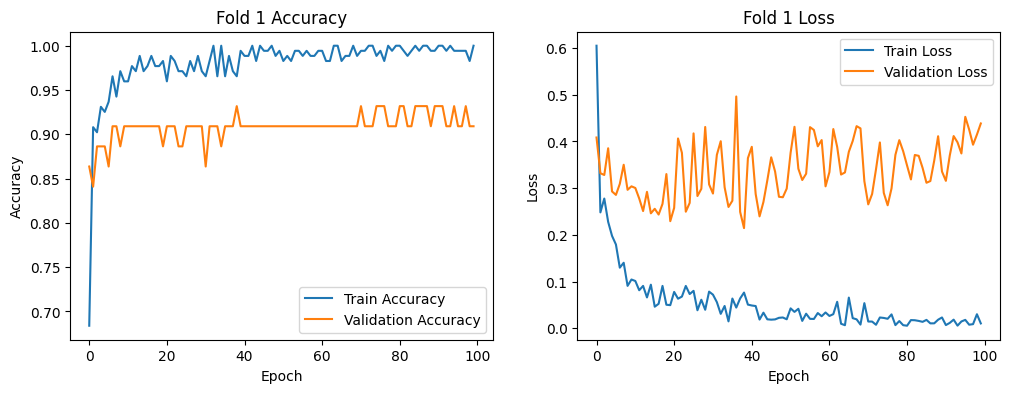

2/2 [==============================] - 0s 112ms/step - loss: 0.4384 - accuracy: 0.9091
Fold 1 - Validation Accuracy: 0.9090909361839294
Training on Fold 2/5
Epoch 1/100
6/6 [==============================] - 9s 646ms/step - loss: 0.7672 - accuracy: 0.6379 - val_loss: 0.3709 - val_accuracy: 0.9091
Epoch 2/100
6/6 [==============================] - 2s 296ms/step - loss: 0.3556 - accuracy: 0.8448 - val_loss: 0.2410 - val_accuracy: 0.8864
Epoch 3/100
6/6 [==============================] - 2s 266ms/step - loss: 0.2508 - accuracy: 0.8736 - val_loss: 0.2015 - val_accuracy: 0.9318
Epoch 4/100
6/6 [==============================] - 2s 278ms/step - loss: 0.2027 - accuracy: 0.9138 - val_loss: 0.1872 - val_accuracy: 0.8864
Epoch 5/100
6/6 [==============================] - 2s 285ms/step - loss: 0.1994 - accuracy: 0.9080 - val_loss: 0.1574 - val_accuracy: 0.9091
Epoch 6/100
6/6 [==============================] - 2s 289ms/step - loss: 0.1388 - accuracy: 0.9425 - val_loss: 0.2065 - val_accuracy: 0.90

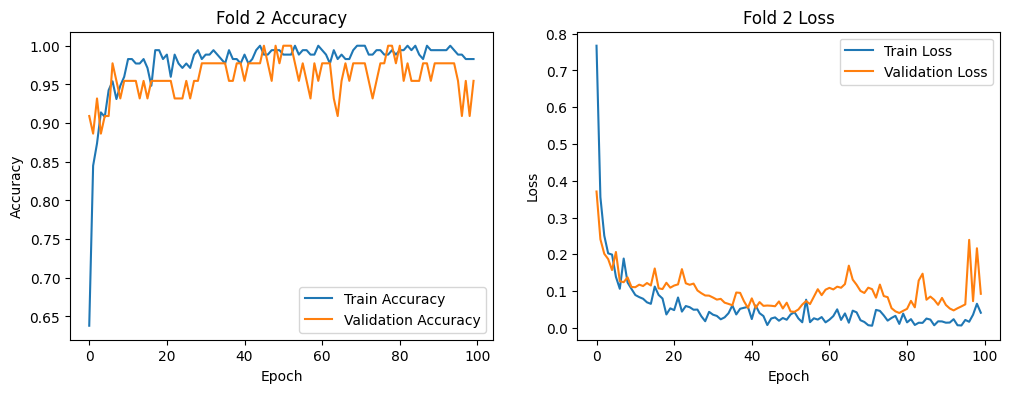

2/2 [==============================] - 0s 120ms/step - loss: 0.0928 - accuracy: 0.9545
Fold 2 - Validation Accuracy: 0.9545454382896423
Training on Fold 3/5
Epoch 1/100
6/6 [==============================] - 10s 715ms/step - loss: 0.7645 - accuracy: 0.6092 - val_loss: 0.2205 - val_accuracy: 0.9091
Epoch 2/100
6/6 [==============================] - 2s 293ms/step - loss: 0.3550 - accuracy: 0.8333 - val_loss: 0.1412 - val_accuracy: 0.9091
Epoch 3/100
6/6 [==============================] - 2s 270ms/step - loss: 0.2439 - accuracy: 0.8966 - val_loss: 0.1161 - val_accuracy: 0.9318
Epoch 4/100
6/6 [==============================] - 2s 292ms/step - loss: 0.1852 - accuracy: 0.9080 - val_loss: 0.1090 - val_accuracy: 0.9545
Epoch 5/100
6/6 [==============================] - 2s 289ms/step - loss: 0.1961 - accuracy: 0.9080 - val_loss: 0.0908 - val_accuracy: 0.9545
Epoch 6/100
6/6 [==============================] - 2s 290ms/step - loss: 0.1554 - accuracy: 0.9368 - val_loss: 0.0839 - val_accuracy: 0.9

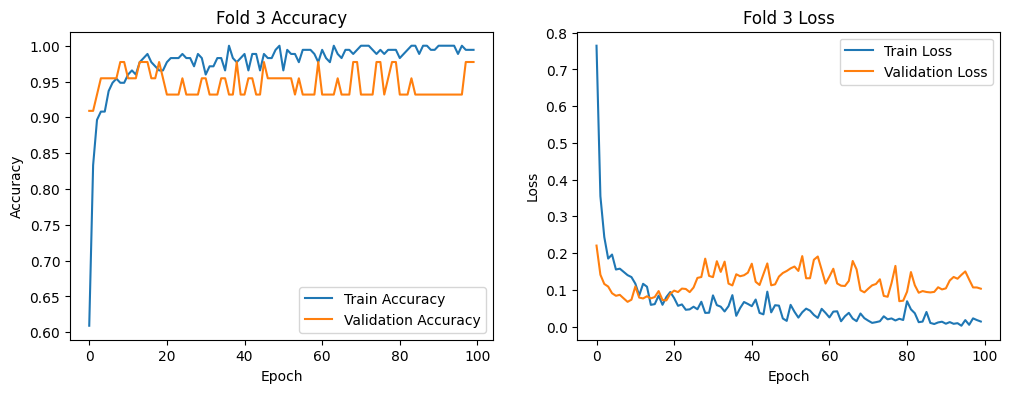

2/2 [==============================] - 0s 121ms/step - loss: 0.1032 - accuracy: 0.9773
Fold 3 - Validation Accuracy: 0.9772727489471436
Training on Fold 4/5
Epoch 1/100
6/6 [==============================] - 9s 658ms/step - loss: 0.7245 - accuracy: 0.6571 - val_loss: 0.2173 - val_accuracy: 0.9302
Epoch 2/100
6/6 [==============================] - 2s 292ms/step - loss: 0.3514 - accuracy: 0.8514 - val_loss: 0.1546 - val_accuracy: 0.9302
Epoch 3/100
6/6 [==============================] - 2s 289ms/step - loss: 0.2591 - accuracy: 0.8971 - val_loss: 0.1525 - val_accuracy: 0.9070
Epoch 4/100
6/6 [==============================] - 2s 263ms/step - loss: 0.2189 - accuracy: 0.9200 - val_loss: 0.1166 - val_accuracy: 0.9302
Epoch 5/100
6/6 [==============================] - 2s 264ms/step - loss: 0.1818 - accuracy: 0.9429 - val_loss: 0.1160 - val_accuracy: 0.9302
Epoch 6/100
6/6 [==============================] - 2s 285ms/step - loss: 0.1147 - accuracy: 0.9714 - val_loss: 0.1200 - val_accuracy: 0.93

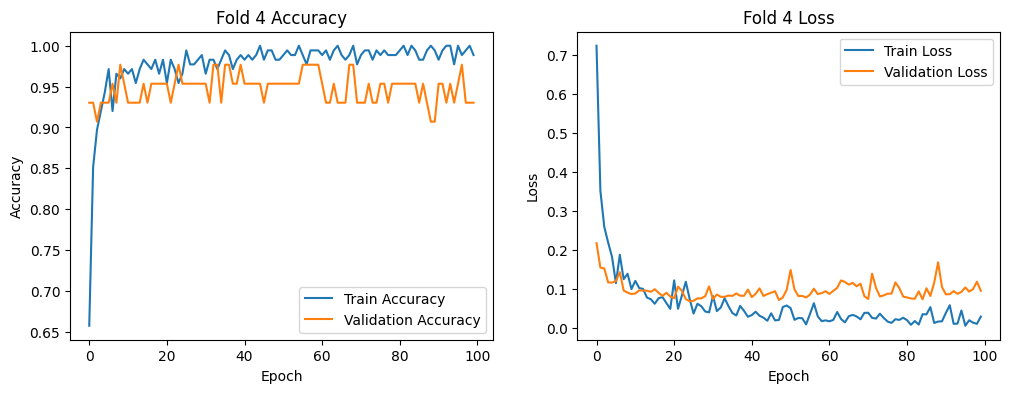

2/2 [==============================] - 0s 112ms/step - loss: 0.0949 - accuracy: 0.9302
Fold 4 - Validation Accuracy: 0.930232584476471
Training on Fold 5/5
Epoch 1/100
6/6 [==============================] - 9s 669ms/step - loss: 0.7186 - accuracy: 0.6629 - val_loss: 0.3396 - val_accuracy: 0.8140
Epoch 2/100
6/6 [==============================] - 2s 290ms/step - loss: 0.3004 - accuracy: 0.9029 - val_loss: 0.3936 - val_accuracy: 0.8605
Epoch 3/100
6/6 [==============================] - 2s 316ms/step - loss: 0.2047 - accuracy: 0.9143 - val_loss: 0.3691 - val_accuracy: 0.8605
Epoch 4/100
6/6 [==============================] - 1s 256ms/step - loss: 0.1388 - accuracy: 0.9314 - val_loss: 0.3182 - val_accuracy: 0.8837
Epoch 5/100
6/6 [==============================] - 2s 288ms/step - loss: 0.1707 - accuracy: 0.9257 - val_loss: 0.4092 - val_accuracy: 0.8605
Epoch 6/100
6/6 [==============================] - 2s 293ms/step - loss: 0.1229 - accuracy: 0.9543 - val_loss: 0.4524 - val_accuracy: 0.860

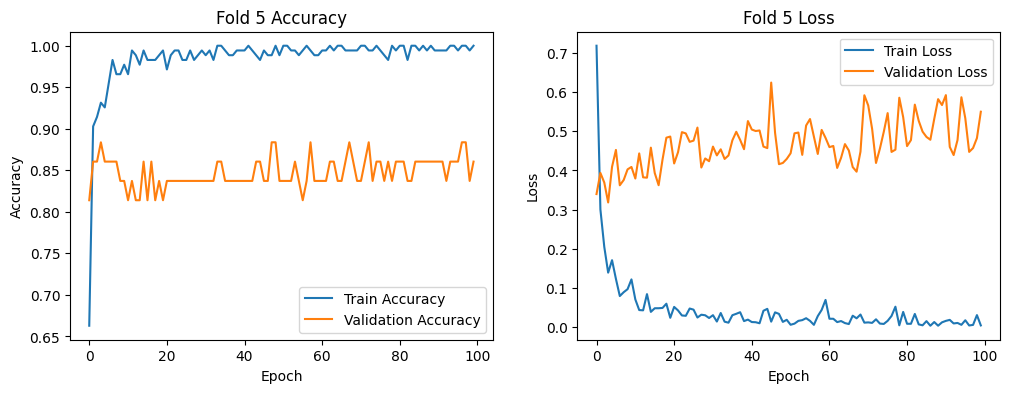

2/2 [==============================] - 0s 111ms/step - loss: 0.5500 - accuracy: 0.8605
Fold 5 - Validation Accuracy: 0.8604651093482971


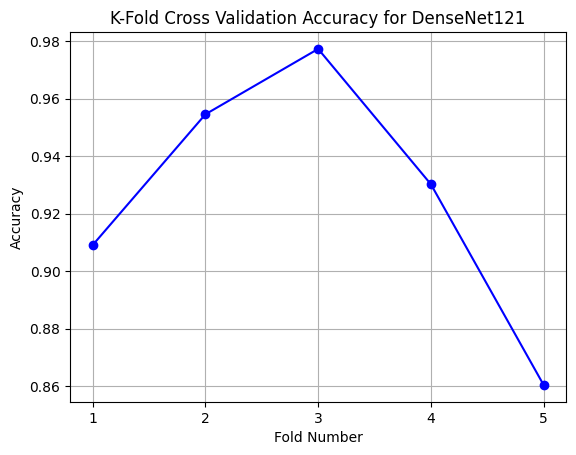


Average Validation Accuracy across 5 folds: 0.9263213634490967


In [ ]:
for fold, (train_idx, val_idx) in enumerate(splits):
    print(f"Training on Fold {fold + 1}/{num_folds}")

    train_images, val_images = images[train_idx], images[val_idx]
    train_labels, val_labels = labels[train_idx], labels[val_idx]

    augmented_train_images = np.array([augment_data(img) for img in train_images])
    val_images = np.array(val_images)

    model = create_model()


    history = model.fit(
        augmented_train_images,
        train_labels,
        validation_data=(val_images, val_labels),
        epochs=epochs,
        batch_size=batch_size
    )

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title(f'Fold {fold + 1} Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'Fold {fold + 1} Loss')
    plt.legend()
    plt.show()


    val_loss, val_accuracy = model.evaluate(val_images, val_labels)
    print(f"Fold {fold + 1} - Validation Accuracy: {val_accuracy}")
    fold_accuracies1.append(val_accuracy)

plt.plot(range(1, num_folds + 1), fold_accuracies1, marker='o', linestyle='-', color='b')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.title('K-Fold Cross Validation Accuracy for DenseNet121')
plt.xticks(range(1, num_folds + 1))
plt.grid(True)
plt.show()

print(f"\nAverage Validation Accuracy across {num_folds} folds: {np.mean(fold_accuracies1)}")

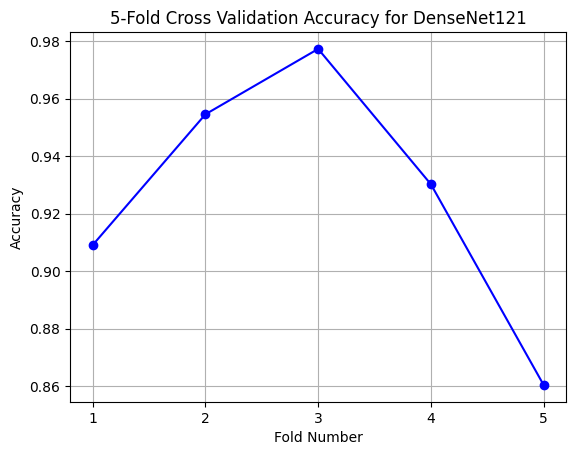

In [ ]:
plt.plot(range(1, 6), fold_accuracies1, marker='o', linestyle='-', color='b')

plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.title('5-Fold Cross Validation Accuracy for DenseNet121')

plt.xticks(range(1, 6))
plt.grid(True)
plt.show()

In [ ]:
print(f"\nAverage Validation Accuracy across {num_folds} folds: {np.mean(fold_accuracies1)}")


Average Validation Accuracy across 5 folds: 0.9263213634490967


In [ ]:
test_images = []
test_labels = []

In [ ]:
for class_name in os.listdir(test_dataset_path):
    class_path = os.path.join(test_dataset_path, class_name)
    label = 0 if class_name == "Healthy MT" else 1

    for filename in os.listdir(class_path):
        img_path = os.path.join(class_path, filename)

        # Load and preprocess the image
        img = load_img(img_path, target_size=(150, 120))
        img = img_to_array(img) / 255.0  # Normalize the image

        # Original image
        test_images.append(img)
        test_labels.append(label)

        # Horizontally flipped image
        flipped_img = np.fliplr(img)
        test_images.append(flipped_img)
        test_labels.append(label)

# Convert lists to arrays
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [ ]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_accuracy}")

1/1 [==============================] - 0s 197ms/step - loss: 0.1880 - accuracy: 0.9583
Test Accuracy: 0.9583333134651184


In [ ]:
predictions = model.predict(test_images)
predicted_classes = (predictions > 0.5).astype(int).flatten()

print("\nConfusion Matrix:")
print(confusion_matrix(test_labels, predicted_classes))
print("\nClassification Report:")
print(classification_report(test_labels, predicted_classes, target_names=["Healthy", "Lesion"]))

1/1 [==============================] - 2s 2s/step

Confusion Matrix:
[[11  1]
 [ 0 12]]

Classification Report:
              precision    recall  f1-score   support

     Healthy       1.00      0.92      0.96        12
      Lesion       0.92      1.00      0.96        12

    accuracy                           0.96        24
   macro avg       0.96      0.96      0.96        24
weighted avg       0.96      0.96      0.96        24



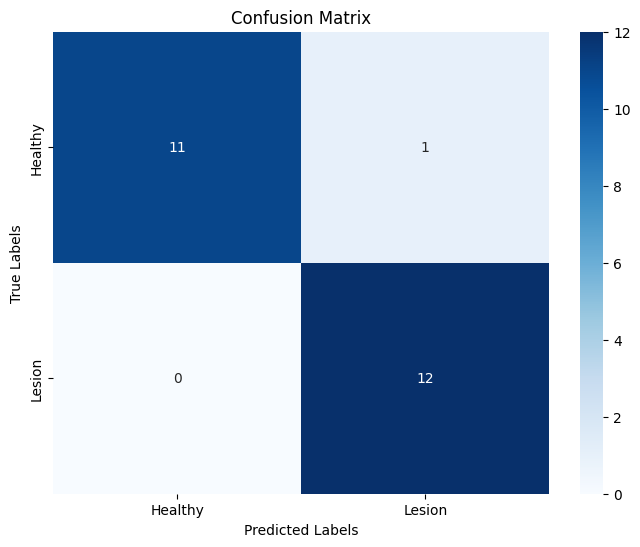

In [ ]:
def plot_confusion_matrix(true_labels, predicted_classes, class_names):
    cm = confusion_matrix(true_labels, predicted_classes)


    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')

    plt.show()

plot_confusion_matrix(test_labels, predicted_classes, class_names=["Healthy", "Lesion"])

1/1 [==============================] - 0s 230ms/step


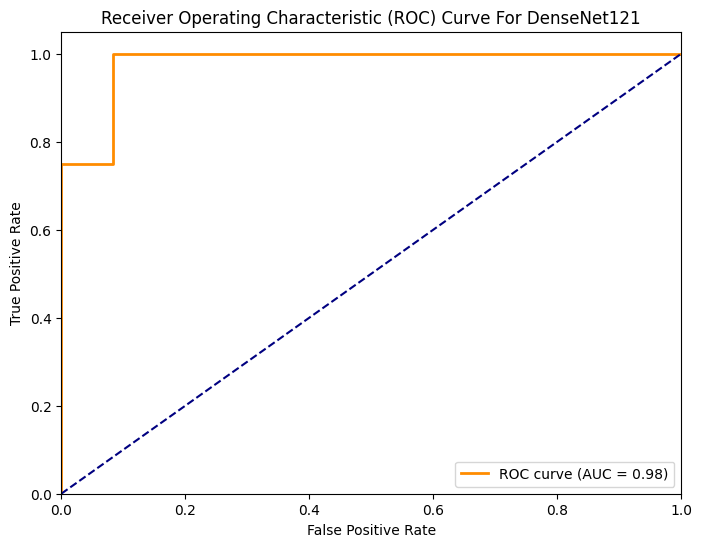

In [ ]:
true_labels = test_labels
predicted_probs = model.predict(test_images)

def plot_roc_curve(true_labels, predicted_probs):
    fpr, tpr, thresholds = roc_curve(true_labels, predicted_probs)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve For DenseNet121')
    plt.legend(loc="lower right")
    plt.show()

plot_roc_curve(true_labels, predicted_probs)

In [ ]:
# from tensorflow.keras.models import load_model

# # Load model from HDF5 file
# model = load_model('model_name.h5')

# # Load model from SavedModel format
# model = load_model('saved_model_directory')